In [209]:
import yfinance as yf
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import pickle


In [ ]:
ticker = yf.Ticker("ABC") # ^GSPC

historical_data = ticker.history(period = "30y")

#ticker.info

$^ABC: possibly delisted; no price data found  (period=30y)


<Axes: >

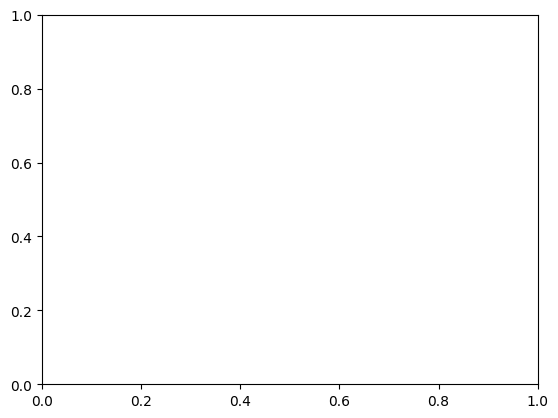

In [146]:
historical_data

#historical_data.loc[historical_data["Stock Splits"] > 0]

sns.lineplot( np.log(historical_data["Open"]) )

#ticker.analyst_price_targets

In [90]:
spx_const = pd.read_csv(r"data\SPXconst.csv")

In [187]:
new_spy = pd.DataFrame()

last_column = spx_const[f"1/1/1996"]
for i in range(1996,2026):
    for j in range(1,13):
        
        new_date = (f"{i}-{j}" if j >= 10 else f"{i}-0{j}")
        columnDict = { new_date : set()}

        for k in range(1,32):
            try:
                last_column = spx_const[f"{j}/{k}/{i}"]

            except:
                pass
            
            for entry in last_column:
                columnDict[new_date].add(entry)    
    
        columnDict[new_date] = list(columnDict[new_date])
        new_column = pd.DataFrame(columnDict)

        new_spy = new_spy.join(new_column, how = "outer")

In [179]:
spx_const

,1/1/1996,1/2/1996,1/3/1996,1/4/1996,1/10/1996,1/11/1996,1/12/1996,1/22/1996,1/23/1996,1/24/1996,...,8/14/2025,8/15/2025,8/16/2025,8/17/2025,8/18/2025,8/19/2025,8/20/2025,8/21/2025,8/22/2025,8/23/2025
0,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,...,A,A,A,A,A,A,A,A,A,A
1,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,AAMRQ,...,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,...,ABBV,ABBV,ABBV,ABBV,ABBV,ABBV,ABBV,ABBV,ABBV,ABBV
3,ABI,ABI,ABI,ABI,ABI,ABI,ABI,ABI,ABI,ABI,...,ABNB,ABNB,ABNB,ABNB,ABNB,ABNB,ABNB,ABNB,ABNB,ABNB
4,ABS,ABS,ABS,ABS,ABS,ABS,ABS,ABS,ABS,ABS,...,ABT,ABT,ABT,ABT,ABT,ABT,ABT,ABT,ABT,ABT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZBH,ZBH,ZBH,ZBH,ZBH,ZBH,ZBH,ZBH,ZBH,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZBRA,ZBRA,ZBRA,ZBRA,ZBRA,ZBRA,ZBRA,ZBRA,ZBRA,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
#spx_const.filter(like = '/1996')

new_spy.to_csv(r"data\SPXconst.csv")

In [124]:
unique_tickers = new_spy.to_numpy().ravel()


In [132]:
unique_tickers2 = []
for i in set(unique_tickers.tolist()):
    if type(i) == str and i != 'nan':
        unique_tickers2.append(i)

len(unique_tickers2)

unique_tickers2


['WOR',
 'GM',
 'BFI',
 'APC',
 'TKO',
 'ABT',
 'DLTR',
 'AMCR',
 'FOXA',
 'HI',
 'BBWI',
 'PMI',
 'GOOGL',
 'CIEN',
 'FOX',
 'VTR',
 'GD',
 'TSLA',
 'PTC',
 'LUB',
 'CYR',
 'GDDY',
 'PPG',
 'CF',
 'COIN',
 'FLMIQ',
 'KLAC',
 'HRS',
 'NWL',
 'CTAS',
 'KDP',
 'AXP',
 'MTB',
 'UNH',
 'SB',
 'BCO',
 'PMCS',
 'CBB',
 'NDAQ',
 'CINF',
 'QCOM',
 'INCY',
 'KHC',
 'WTW',
 'ESV',
 'SFS',
 'LU',
 'BX',
 'ORCL',
 'COL',
 'HPC',
 'EQIX',
 'NCE',
 'ARC',
 'UAL',
 'KMG',
 'EOG',
 'PNW',
 'IVZ',
 'SVU',
 'CAR',
 'AVB',
 'HRL',
 'WIN',
 'ILMN',
 'CNX',
 'CTVA',
 'NYN',
 'ASND',
 'HAS',
 'CCB',
 'AWE',
 'AIZ',
 'FISV',
 'USH',
 'DPHIQ',
 'LRCX',
 'HLT',
 'WB',
 'WLL',
 'AMCC',
 'LSI',
 'FII',
 'APCC',
 'LHX',
 'WYE',
 'GOOG',
 'LLY',
 'CPRT',
 'NSC',
 'KSE',
 'GHC',
 'BLDR',
 'ZBH',
 'APH',
 'TNB',
 'AOS',
 'SO',
 'ED',
 'ALLE',
 'ABMD',
 'DASH',
 'ABS',
 'EXR',
 'HES',
 'MO',
 'FRX',
 'CCTYQ',
 'VRTS',
 'BTUUQ',
 'CDW',
 'BWA',
 'CNXT',
 'SYK',
 'MERQ',
 'SBNY',
 'AT',
 'BSX',
 'KEYS',
 'BDK',
 'FDX',

In [133]:
tickers_input = " ".join(unique_tickers2)

In [159]:
ticker = yf.Tickers(tickers_input) # ^SPX

historical_data = ticker.history(period = "31y")

$JNY: possibly delisted; no price data found  (period=31y)
[                       1%                       ]  12 of 1122 completed$SIVB: possibly delisted; no price data found  (period=31y) (Yahoo error = "No data found, symbol may be delisted")
[*                      2%                       ]  19 of 1122 completed$TRW: possibly delisted; no price data found  (period=31y)
[*                      2%                       ]  20 of 1122 completed$FL: possibly delisted; no price data found  (period=31y) (Yahoo error = "No data found, symbol may be delisted")
[*                      2%                       ]  21 of 1122 completed$JHF: possibly delisted; no price data found  (period=31y)
[*                      2%                       ]  23 of 1122 completed$ENRNQ: possibly delisted; no price data found  (period=31y)
[*                      2%                       ]  27 of 1122 completed$JOS: possibly delisted; no price data found  (period=31y)
[*                      3%               

In [ ]:
for i in range(1996,2026):
    historical_data["Close"].loc[historical_data["Ticker"]["Date"]]

Ticker,A,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,ABMD,...,XRX,XTO,XYL,XYZ,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1996-02-14,NaN,NaN,NaN,NaN,0.206932,NaN,NaN,NaN,NaN,NaN,...,22.837528,NaN,NaN,NaN,NaN,NaN,NaN,12.583333,10.799961,NaN
1996-02-15,NaN,NaN,NaN,NaN,0.209741,NaN,NaN,NaN,NaN,NaN,...,22.510031,NaN,NaN,NaN,NaN,NaN,NaN,12.159722,10.657389,NaN
1996-02-16,NaN,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN,...,22.313530,NaN,NaN,NaN,NaN,NaN,NaN,11.777778,10.621742,NaN
1996-02-20,NaN,NaN,NaN,NaN,0.217232,NaN,NaN,NaN,NaN,NaN,...,22.641024,NaN,NaN,NaN,NaN,NaN,NaN,11.222222,10.407879,NaN
1996-02-21,NaN,NaN,NaN,NaN,0.221914,NaN,NaN,NaN,NaN,NaN,...,22.684696,NaN,NaN,NaN,NaN,NaN,NaN,12.222222,10.372238,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-09,127.500000,14.99,NaN,55.299999,274.619995,223.259995,NaN,24.969999,NaN,NaN,...,2.110000,NaN,140.190002,56.779999,NaN,158.899994,89.730003,257.790009,64.693909,127.300003
2026-02-10,129.000000,15.10,NaN,56.599998,273.679993,222.440002,NaN,24.980000,NaN,NaN,...,2.110000,NaN,128.919998,57.299999,NaN,158.850006,91.400002,256.570007,63.621632,128.130005
2026-02-11,128.899994,14.35,NaN,59.630001,275.500000,220.889999,NaN,24.969999,NaN,NaN,...,2.070000,NaN,126.769997,53.810001,NaN,159.059998,95.610001,252.500000,62.459999,128.669998


In [204]:
historical_data_open = historical_data["Open"].dropna(axis=1)
historical_data_close = historical_data["Close"].dropna(axis=1)

In [208]:


for i in range(1996, 2026):

    historical_data.loc[pd.Timestamp(year = i, month = 1, day = 1) : pd.Timestamp( year = i+3, month = 12, day = 31) ]["Close"].dropna(axis=1).to_csv(f"data\\Close-{i}.csv")

    historical_data.loc[pd.Timestamp(year = i, month = 1, day = 1) : pd.Timestamp( year = i+3, month = 12, day = 31) ]["Open"].dropna(axis=1).to_csv(f"data\\Open-{i}.csv")

In [197]:
historical_data.loc[pd.Timestamp(year = 1996, month = 1, day = 1) : pd.Timestamp( year = 1996, month = 12, day = 31) ]["Close"]

Ticker,A,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,ABMD,...,XRX,XTO,XYL,XYZ,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-02,NaN,NaN,NaN,NaN,0.240640,NaN,NaN,NaN,NaN,NaN,...,23.841867,NaN,NaN,NaN,NaN,NaN,NaN,15.388889,11.298965,NaN
1996-01-03,NaN,NaN,NaN,NaN,0.240640,NaN,NaN,NaN,NaN,NaN,...,23.820032,NaN,NaN,NaN,NaN,NaN,NaN,15.666667,11.049460,NaN
1996-01-04,NaN,NaN,NaN,NaN,0.236427,NaN,NaN,NaN,NaN,NaN,...,23.317862,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,10.586093,NaN
1996-01-05,NaN,NaN,NaN,NaN,0.256559,NaN,NaN,NaN,NaN,NaN,...,23.055872,NaN,NaN,NaN,NaN,NaN,NaN,13.444444,10.621745,NaN
1996-01-08,NaN,NaN,NaN,NaN,0.259367,NaN,NaN,NaN,NaN,NaN,...,23.012188,NaN,NaN,NaN,NaN,NaN,NaN,13.444444,10.514812,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-24,NaN,NaN,NaN,NaN,0.173223,NaN,NaN,NaN,NaN,NaN,...,27.415876,NaN,NaN,NaN,NaN,NaN,NaN,10.333333,14.670948,NaN
1996-12-26,NaN,NaN,NaN,NaN,0.172287,NaN,NaN,NaN,NaN,NaN,...,27.885098,NaN,NaN,NaN,NaN,NaN,NaN,10.444444,14.960737,NaN
1996-12-27,NaN,NaN,NaN,NaN,0.173223,NaN,NaN,NaN,NaN,NaN,...,27.616976,NaN,NaN,NaN,NaN,NaN,NaN,10.333333,14.960737,NaN


In [217]:
with open("results-Intraday-240-1-RF\predictions-1999.pickle", "rb") as file:
    preds = pickle.load(file)

preds

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\dereu\AppData\Local\Temp\ipykernel_7388\2365441530.py:1: SyntaxWarning: invalid escape sequence '\p'
  with open("results-Intraday-240-1-RF\predictions-1999.pickle", "rb") as file:


{'1999-02-08': array([0.54515343, 0.51554817, 0.49611094, 0.47302044, 0.50218066,
        0.49615955, 0.47731652, 0.47168305, 0.5134004 , 0.50353721,
        0.48235931, 0.4601927 , 0.46879278, 0.44764389, 0.52959954,
        0.45234089, 0.46564116, 0.52979666, 0.45133378, 0.50444151,
        0.45083618, 0.51238858, 0.5024742 , 0.46266133, 0.46896517,
        0.50526482, 0.46106196, 0.48033041, 0.45837558, 0.52591012,
        0.51336816, 0.52972538, 0.48390561, 0.47493649, 0.51373807,
        0.5344104 , 0.51640089, 0.46071205, 0.46583503, 0.49680529,
        0.45271445, 0.50294736, 0.47933266, 0.51786895, 0.45260048,
        0.48535381, 0.51848067, 0.47776248, 0.49241672, 0.48096983,
        0.48707246, 0.519538  , 0.47581725, 0.51279048, 0.45790393,
        0.51447997, 0.47703722, 0.50908225, 0.47824892, 0.50917801,
        0.49384407, 0.46219108, 0.41223172, 0.48667597, 0.48319482,
        0.50345458, 0.469324  , 0.50499565, 0.49519852, 0.47735045,
        0.48560996, 0.49470532, 0.